In [1]:
# Code used to create Figure 4.11 in Ch. 4 of KDE plot of percentage difference in LCUE of subset of sites with 
# zero unmet energy fraction in S0 (124 sites)
# Created 10Jul23 - for thesis VF submission
# Based on Jupyter notebook: diff_lcue_subset

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Move to path where csv is saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs"

cwd = os.getcwd()
cwd

os.chdir(path)

In [2]:
pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs'

In [3]:
# First remove sites with unmet energy fraction !=0
# List of sites with Unmet_energy_fraction of 0 in S0 (n=124) taken from 'subset_unmet0.py'
subset_list= ['AIC_Nadoto_Primary_School', 'AIC_Nayanaekaton_Primary_School',\
'A_IC_Gangani_Primary_School', 'Abagarse_Primary_School', 'Akadeli_Primary_School',\
'Akili_Primary_School', 'Bahero_Primary_School', 'Balaga_Primary_School',\
'Bomani_Primary_School', 'Boyani_Dispensary', 'Boyani_West_Primary_School',\
'Busa_Dispensary', 'Chidzaya_Primary_School', 'Chingombero_Dispensary',\
'Daaba_Primary_School', 'Dadachabasa_Primary_School', 'Dera_Tumaini_Primary_School',\
'Dighai_Primary_School', 'Dzendereni_Primary_School', 'Dzombo_Primary_School',\
'Ekoropus_Primary_School', 'Elsa_Primary_School', 'Fudumulo_Primary_School',\
'Galmadido_Primary_School', 'Gamachu_Primary_School', 'Garbatula_Primary_Boarding',\
'Gozani_Primary_School', 'Hawe_Wanje_Primary_School', 'Isiolo_Samburu_Complex_Dispensary',\
'Isiolo_Samburu_Complex_Primary_School', 'Jezazhomu_Primary_School', 'Jitegemee_Primary_School',\
'Kaalem_Primary_School', 'Kadunguni_Primary_School', 'Kalokoda_Primary_School',\
'Kaluweni_Primary_School', 'Karyaka_Primary_School', 'Kasuroi_Primary_School',\
'Kavunyalo_Dispensary', 'Kawala_Girls_Secondary_School', 'Kawalash_Primary_School',\
'Kibora_Primary_School', 'Kidomaya_Primary_School', 'Kikonde_Primary_School',\
'Kinna_Primary_School', 'Kithengwani_Primary_School', 'Kituoni_Primary_School',\
'Kizimbani_Primary_School', 'Kombola_primary_school', 'Konjora_Primary_School',\
'Kubimatamuka_Primary_School', 'KulaMawe_Primary_School', 'Kulalu_Primary_School',\
'Lakole_Primary_School', 'Lobei_Primary_School', 'Loruth_Primary_School',\
'Lunguma_Primary_School', 'Mabayani_Primary_School', 'Mabesheni_Dispensary',\
'Madibwani_Primary_School', 'Maendeleo_Primary_School', 'Mafisini_Primary_School',\
'Magale_Primary_School', 'Magodzoni_Primary_School', 'Maiyini_Primary_School',\
'Makamini_Dispensary', 'Malkadaka_Primary_School', 'Mama_Saleti_Primary_School',\
'Maphanga_Primary_School', 'Marafiki_Primary_School', 'Mataarba_Primary_School',\
'Matolani_Primary_School', 'Mawe_Mabomu_Primary_School', 'Mazola_Dispensary',\
'Mbararani_Primary_School', 'Mbilini_Primary_School', 'Mbulia_Dispensary',\
'Melikubwa_Primary_School', 'Merti_Muslim_Primary_School', 'Mikameni_Primary_School',\
'Mitangani_Primary_School', 'Mitangoni_Primary_School', 'Mitunguni_Primary_School',\
'Mlilo_Primary_School', 'Mlola_Primary_School', 'Mogore_Primary_School',\
'Mrima_Wa_Kuku_Primary_School', 'Mtsangatamu_Primary_School', 'Mtumwa_Dispensary',\
'Muchuro_Primary_School', 'Mugumoni_Primary_School', 'Munandanur_Primary_School',\
'Mwaluvuno_Primary_School', 'Mwamambi_Primary_School', 'Mwangani_Primary_School',\
'Mwangaza_Primary_School', 'Mwanza_Primary_School', 'Mwanzwani_Primary_School',\
'Mwele_Primary_School', 'Mwembe_Kati_Dispensary', 'Nabeiye_Primary_School',\
'Nagaa_Primary_School', 'Nakaalei_Primary_School', 'Nakitoekakumon_Primary_School',\
'Namakat_Primary_School', 'Naroo_Primary_School', 'Ndugu_Zangu_Integrated_Primary_School',\
'Ngoloko_Primary_School', 'Nyango_Primary_School', 'Paola_Katsuhanzala_Primary_School',\
'Sagalato_Primary_School', 'Saghaighu_dispensary', 'Sembe_Primary_School',\
'Shakahola_Dispensary', 'Shauri_Moyo_Primary_School', 'Silaloni_Primary_School',\
'Simanya_Primary_School', 'Tiwi_Boys_Secondary_school', 'Todonyang_Primary_School',\
'Uhuru_Primary_School', 'Vithunguni_Primary_School', 'Watala_Primary_School',\
'Ziwani_Primary_School', 'Ziyaradundo_Primary_School']

In [4]:
print(subset_list)    # should be 124 in this case (124 sites with unmet of 0 in S0)

['AIC_Nadoto_Primary_School', 'AIC_Nayanaekaton_Primary_School', 'A_IC_Gangani_Primary_School', 'Abagarse_Primary_School', 'Akadeli_Primary_School', 'Akili_Primary_School', 'Bahero_Primary_School', 'Balaga_Primary_School', 'Bomani_Primary_School', 'Boyani_Dispensary', 'Boyani_West_Primary_School', 'Busa_Dispensary', 'Chidzaya_Primary_School', 'Chingombero_Dispensary', 'Daaba_Primary_School', 'Dadachabasa_Primary_School', 'Dera_Tumaini_Primary_School', 'Dighai_Primary_School', 'Dzendereni_Primary_School', 'Dzombo_Primary_School', 'Ekoropus_Primary_School', 'Elsa_Primary_School', 'Fudumulo_Primary_School', 'Galmadido_Primary_School', 'Gamachu_Primary_School', 'Garbatula_Primary_Boarding', 'Gozani_Primary_School', 'Hawe_Wanje_Primary_School', 'Isiolo_Samburu_Complex_Dispensary', 'Isiolo_Samburu_Complex_Primary_School', 'Jezazhomu_Primary_School', 'Jitegemee_Primary_School', 'Kaalem_Primary_School', 'Kadunguni_Primary_School', 'Kalokoda_Primary_School', 'Kaluweni_Primary_School', 'Karyaka_

In [5]:
len(subset_list)    # should be 124 in this case (124 sites with unmet of 0 in S0)

124

In [6]:
# Imports/reads csv of LCUE of S0-S4 (created with another code)
data = pd.read_csv("lcue_s0_s4.csv")

In [7]:
# Creates new df including only subset of sites on subset_list:
data_subset = data[data["Site_name"].isin(subset_list)]
data_subset.head(10).round(2)

,Site_name,County,Institution,S0_LCUE,S1_LCUE,S2_LCUE,S3_LCUE,S4_LCUE
0,AIC_Nadoto_Primary_School,Turkana,School,1.79,1.52,1.31,1.12,1.08
1,AIC_Nayanaekaton_Primary_School,Turkana,School,2.28,1.47,1.29,1.21,1.21
2,A_IC_Gangani_Primary_School,Kwale,School,1.33,0.86,0.86,0.79,0.79
3,Abagarse_Primary_School,Isiolo,School,2.51,1.52,1.33,1.33,1.33
4,Akadeli_Primary_School,Isiolo,School,1.05,0.81,0.64,0.60,0.60
5,Akili_Primary_School,Isiolo,School,1.52,1.16,0.98,0.98,0.93
8,Bahero_Primary_School,Kilifi,School,1.18,1.10,0.92,0.83,0.81
9,Balaga_Primary_School,Kilifi,School,1.00,0.85,0.77,0.77,0.71
12,Bomani_Primary_School,Kwale,School,1.14,1.01,0.83,0.75,0.75
13,Boyani_Dispensary,Kilifi,Clinic,0.87,0.64,0.47,0.43,0.43


In [8]:
data_subset.describe().round(2)

,S0_LCUE,S1_LCUE,S2_LCUE,S3_LCUE,S4_LCUE
count,124.00,124.00,124.00,124.00,124.00
mean,1.71,1.22,1.08,1.02,1.00
std,0.92,0.51,0.47,0.46,0.46
min,0.66,0.56,0.46,0.42,0.40
25%,1.09,0.86,0.77,0.73,0.70
50%,1.45,1.06,0.93,0.90,0.88
75%,2.14,1.51,1.29,1.23,1.21
max,6.96,4.21,3.66,3.66,3.66


In [9]:
# Define function to calculate percentage change
def percentage_change(col1, col2):
    return ((col2 - col1) / col1) * 100

# Create new pandas DataFrame from copy of original df
perchange = data_subset[["Site_name", "County", "Institution"]].copy()

In [10]:
# Add columns with calculated values of percentage change vs S0
perchange["S1_S0"] = percentage_change(data_subset["S0_LCUE"], data_subset["S1_LCUE"]).round(2)
perchange["S2_S0"] = percentage_change(data_subset["S0_LCUE"], data_subset["S2_LCUE"]).round(2)
perchange["S3_S0"] = percentage_change(data_subset["S0_LCUE"], data_subset["S3_LCUE"]).round(2)
perchange["S4_S0"] = percentage_change(data_subset["S0_LCUE"], data_subset["S4_LCUE"]).round(2)

In [11]:
# To see how the data looks, here it shows the % change in LCUEs of S1-S4 vs S0
perchange.describe().round(2) # this is what I put in Ch. 4 analysis (mean values of % difference)

,S1_S0,S2_S0,S3_S0,S4_S0
count,124.00,124.00,124.00,124.00
mean,-24.86,-34.02,-38.22,-39.47
std,11.71,8.88,7.70,7.24
min,-54.12,-58.80,-62.63,-62.63
25%,-32.86,-39.34,-45.79,-45.94
50%,-23.32,-35.08,-35.36,-38.74
75%,-15.18,-26.94,-34.06,-34.24
max,1.07,-14.42,-21.37,-21.37


In [12]:
# To check sites with positive cost difference
perchange.loc[(perchange["S1_S0"] >= 0)] # can check for S2_S0, etc. but they have no positive values
# another way of doing it: 
# perchange[perchange["S1_S0"] > 0]

,Site_name,County,Institution,S1_S0,S2_S0,S3_S0,S4_S0
35,Garbatula_Primary_Boarding,Isiolo,School,1.07,-18.52,-22.28,-25.91
41,Jezazhomu_Primary_School,Kilifi,School,1.05,-14.42,-21.40,-23.72
91,Maphanga_Primary_School,Kwale,School,0.79,-28.48,-34.06,-37.34


In [13]:
# These sites have a cost increase % in S1 vs S0 because their optimum sizes in S1 are
# similar to Impala system but either the panel or battery is slightly higher and thus
# costs are higher, e.g. Garbatula & Jezazhomu optimum size is 1.325 kWp, 5 kWh; 
# for Maphanga is 0.795 kWp, 6 kWh. 
# Maybe delete these 3 sites in the future for final plot?

# Import library to plot and set style in Seaborn
import seaborn as sns

# Set style in Seaborn to plot
sns.set(rc={"figure.dpi":300})
sns.set_context("paper")  # change to notebook? I prefer notebook style i think...
sns.set_style("ticks") # with axis ticks, no background lines
# sns.set_style("whitegrid")

In [14]:
# Define my Set2 custom palette without S0 color
colors = ["#fc8d62", "#8da0cb", "#e78ac3", "#a6d854"]

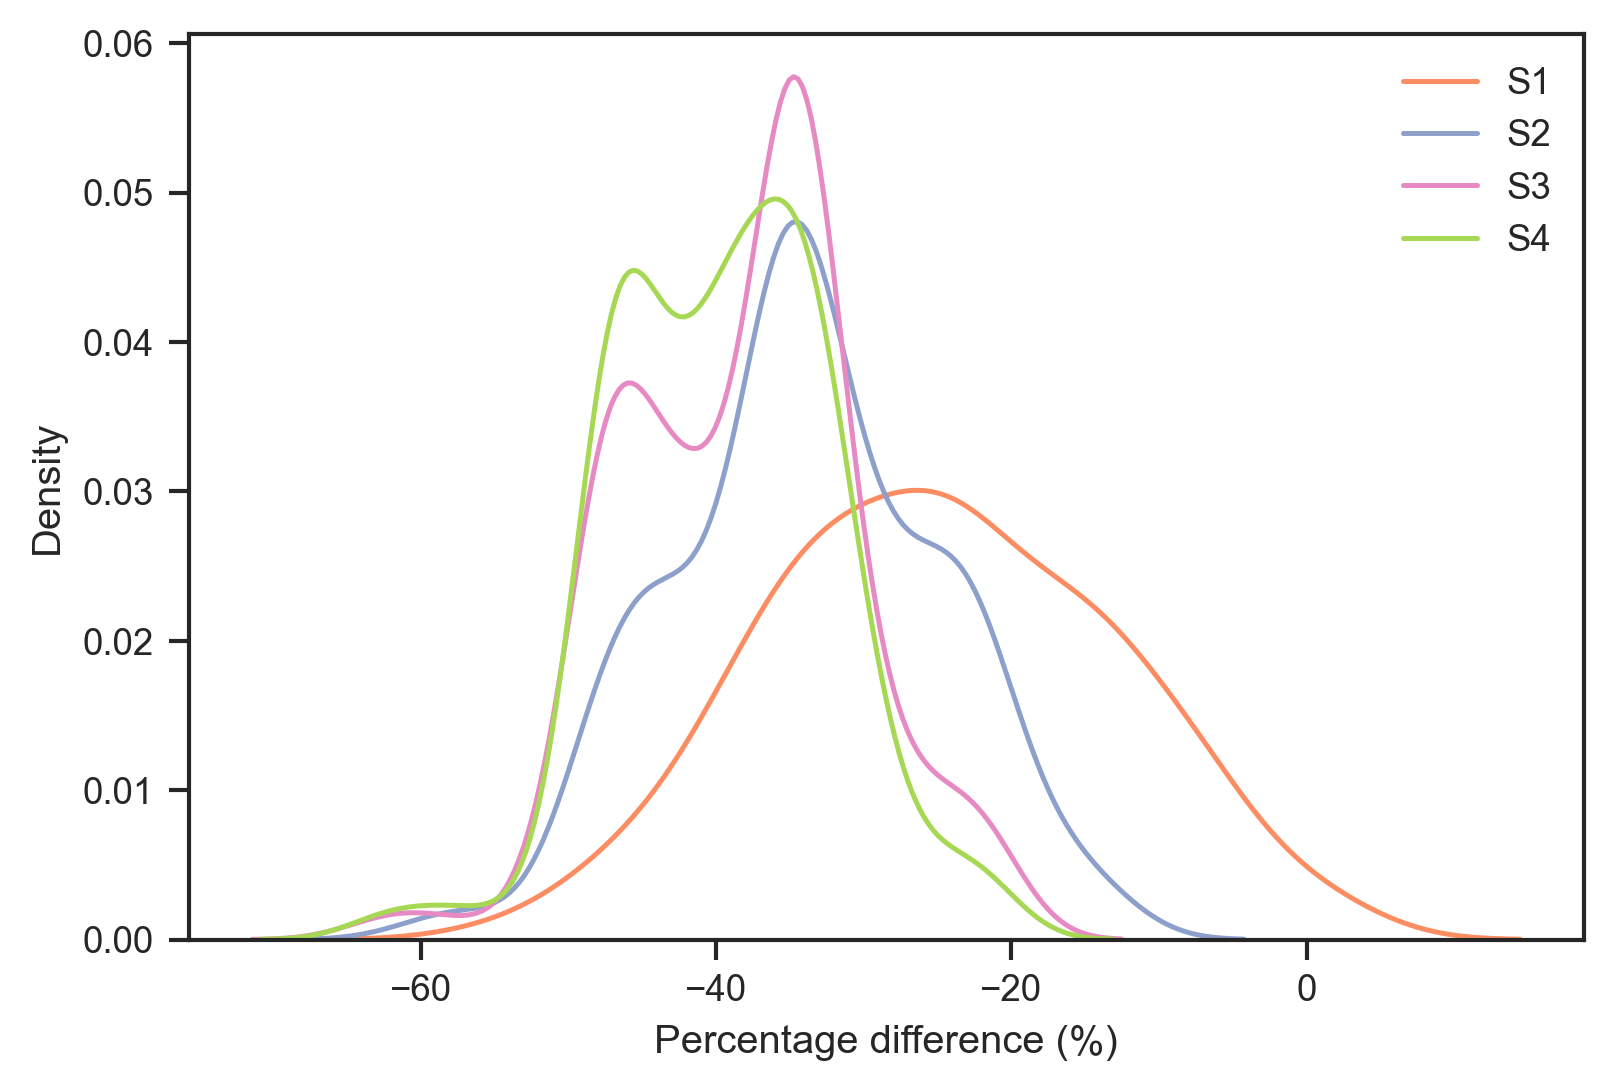

In [17]:
# Final version of plot (for now)
# (bandwidth = 1 or default)

fig,ax = plt.subplots(1,1)
sns.kdeplot(data=perchange.S1_S0, bw_adjust=1, color=colors[0],label="S1", ax=ax) # fill=True
sns.kdeplot(data=perchange.S2_S0, bw_adjust=1, color=colors[1],label="S2", ax=ax) # fill=True
sns.kdeplot(data=perchange.S3_S0, bw_adjust=1, color=colors[2],label="S3", ax=ax) # fill=True
sns.kdeplot(data=perchange.S4_S0, bw_adjust=1, color=colors[3],label="S4", ax=ax) # fill=True
plt.xlabel("Percentage difference (%)")
plt.legend(frameon=False)
plt.savefig("Fig_4.11.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# If I rerun this code in the future, change the PDF figure name to keep previous copy (adding date maybe)
# I manually moved the PDF to folder: "PhD thesis images submission"

# [AG] suggested to add to the plot: show the mean or median as a vertical dotted line for each distribution... 
# so the mean values found in perchange df. I tried to do it but didn't work (see below) so I will leave it for now.
# Maybe check code used to make consumption analysis barplots to see how to add a line in x-axis. 

ValueError: [0] is not a valid value for color

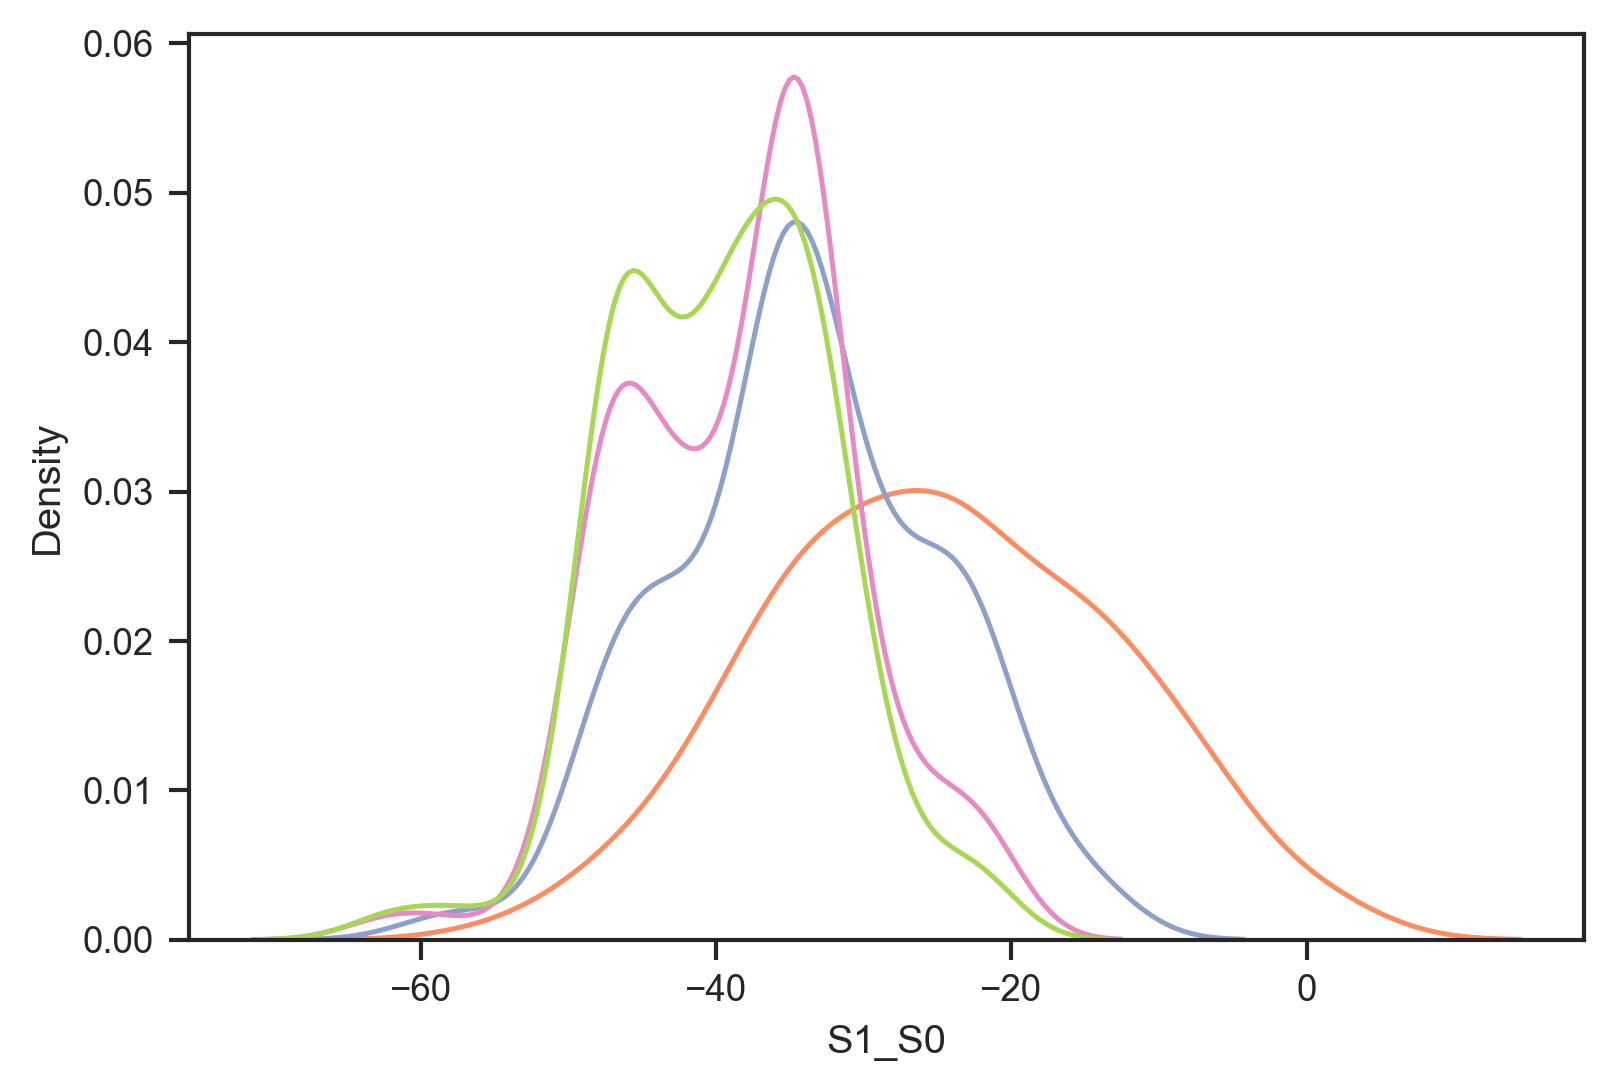

In [20]:
fig,ax = plt.subplots(1,1)
sns.kdeplot(data=perchange.S1_S0, bw_adjust=1, color=colors[0],label="S1", ax=ax) # fill=True
sns.kdeplot(data=perchange.S2_S0, bw_adjust=1, color=colors[1],label="S2", ax=ax) # fill=True
sns.kdeplot(data=perchange.S3_S0, bw_adjust=1, color=colors[2],label="S3", ax=ax) # fill=True
sns.kdeplot(data=perchange.S4_S0, bw_adjust=1, color=colors[3],label="S4", ax=ax) # fill=True
plt.plot(24.86,0, linestyle="--", color=[0])
plt.xlabel("Percentage difference (%)")
plt.legend(frameon=False)
#plt.savefig("change_name.pdf", dpi=300, bbox_inches="tight")
plt.show()